<a href="https://colab.research.google.com/github/anilbhatt1/Deep_Learning_EVA6_Phase1/blob/main/EVA6P1_S3_MNIST_Backprop_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! nvidia-smi

Fri May 21 10:25:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#!pip install torch==1.5.0+cu92 torchvision==0.6.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
print('Pytorch version:', torch.__version__)

Pytorch version: 1.8.1+cu101


In [26]:
t1 = torch.Tensor()
t2 = torch.Tensor()
for i in range(32):
    if i == 0:
        t1 = torch.randint(0,9, (1,1)).expand(28, 28, 1).unsqueeze(0)
        t2 = torch.randint(0,9, (1,))
        #t02 = torch.randint(0,9, (1,))
        t3 = t2.expand(28, 28, 1).unsqueeze(0)
    else:
        temp1 = torch.randint(0,9, (1,1)).expand(28, 28, 1).unsqueeze(0)
        temp2 = torch.randint(0,9, (1,))
        #temp02 = torch.randint(0,9, (1,))
        temp3 = temp2.expand(28, 28, 1).unsqueeze(0)
        t1 = torch.cat((t1, temp1))
        t2 = torch.cat((t2, temp2))
        #t02 = torch.cat((t02, temp02))
        t3 = torch.cat((t3, temp3))        
t4 = t1 + t3 
t5 = torch.randint(0, 9, (32, 2))
t6 = t5[:, :1]
t7 = t5[:, 1:]     
print('t1.size() , t2.size(), t3.size() , t4.size():', t1.size(), t2.size(), t3.size(), t4.size())  
print('t5.size() :', t5.size(), 't6.size() :', t6.size(), 't6.size() :', t6.size())  
#print('t02.size() :', t02.size())

t1.size() , t2.size(), t3.size() , t4.size(): torch.Size([32, 28, 28, 1]) torch.Size([32]) torch.Size([32, 28, 28, 1]) torch.Size([32, 28, 28, 1])
t5.size() : torch.Size([32, 2]) t6.size() : torch.Size([32, 1]) t6.size() : torch.Size([32, 1])


In [30]:
t8 = torch.randint(0,9, (32,1))
print('t8[:3,:] :',t8[:3,:])
#print('t2[:3,:] :',t2[:3,:])
t8.size(), t8.size(0)

t8[:3,:] : tensor([[5],
        [8],
        [7]])


(torch.Size([32, 1]), 32)

In [ ]:
t9 = t8 + t2
t9[:3, :]

tensor([[ 9],
        [14],
        [ 7]])

In [ ]:
t10 = torch.randint(0, 9, (3, 1))
t11 = torch.randint(0, 9, (3, 1))
t12 = torch.cat((t10, t11),dim =1)
print('t10.size(), t11.size(), t12.size():',t10.size(), t11.size(), t12.size())

t10.size(), t11.size(), t12.size(): torch.Size([3, 1]) torch.Size([3, 1]) torch.Size([3, 2])


In [ ]:
t1.size()

torch.Size([28, 28, 1])

In [ ]:
t13 = torch.rand(32,28, 28, 1)
t14 = torch.rand(32,28, 28, 1)
t15 = torch.cat((t13,t14),dim=1)
print(t15.size())

SyntaxError: ignored

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [4]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
torch.Size([128])


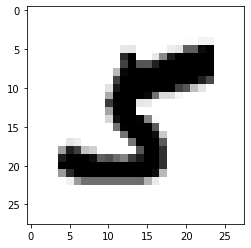

In [7]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)  # iter() creates a data iterator object which will useful during loops like for, while etc.
images, labels = dataiter.next()  

print(images.shape)
print(labels.shape)
# images[0] will be a tensor of 28x28x1 shape i.e. 1 block of 28x28 matrix. There will be 128 such images in a batch as we chose to gave batch 
# size as 128

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[72].numpy().squeeze(), cmap='gray_r')

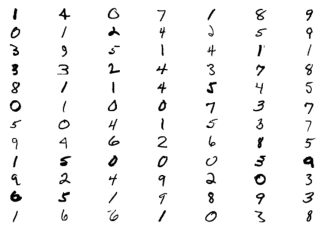

In [8]:
# images[index].numpy().squeeze() -> This helps to remove the 3rd dimension and give us a tensor of shape 28x28 which can be displayed
figure = plt.figure()
num_of_images = 84
for index in range(1, num_of_images + 1):
    plt.subplot(12, 7, index)   # 12 x 7 = 84
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
dropout_value = 0.1
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) # in = 28x28x1 , out = 26x26x32, RF = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # in = 26x26x32 , out = 24x24x16, RF = 5
 
        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # in = 24x24x16 , out = 12x12x16, RF = 6

        # CONVOLUTION BLOCK 2
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # in = 12x12x16 , out = 10x10x16, RF = 10
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # in = 10x10x16 , out = 8x8x16, RF = 14

        # OUTPUT BLOCK
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) # in = 8x8x16 , out = 6x6x32, RF = 18
        self.Gap1 = nn.Sequential(
            nn.AdaptiveAvgPool2d(output_size=(1,1))
        ) # in = 6x6x32 , out = 1x1x32, RF = 28	        
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=32, out_features=10, bias=False)
        ) # in = 1x1x32 , out = 1x1x10, RF = 28
        self.fc2 = nn.Sequential(
            nn.Linear(in_features=32, out_features=18, bias=False)
        ) # in = 1x1x32 , out = 1x1x18, RF = 28

    def forward(self, x):
        x = self.convblock2(self.convblock1(x))
        x = self.pool1(x)
        x = self.convblock4(self.convblock3(x))
        x = self.Gap1(self.convblock5(x))
        x = x.view(-1, 32)
        x1 = self.fc1(x)
        x1 = x1.view(-1, 10)
        a = F.log_softmax(x1, dim=-1)
        y = self.fc2(x)
        b = F.log_softmax(y, dim=-1)
        return a, b

In [19]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
           Dropout-4           [-1, 32, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           4,608
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           2,304
             ReLU-11           [-1, 16, 10, 10]               0
      BatchNorm2d-12           [-1, 16, 10, 10]              32
          Dropout-13           [-1, 16, 10, 10]               0
           Conv2d-14             [

In [20]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc1, train_acc2 = [], []
test_acc1, test_acc2 = [], []
train_acc1_epoch, train_acc2_epoch  = [], []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct, correct_2 = 0, 0
  correct_2 =0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)
    batch = data.size(0)

    for i in range(batch):
        if i == 0:
            random_1     = torch.randint(0,9, (1,))
            random_batch = random_1.expand(1, 28, 28).unsqueeze(0)
        else:
            temp1 = torch.randint(0,9, (1,))
            temp2 = temp1.expand(1, 28, 28).unsqueeze(0)         
            random_1     = torch.cat((random_1, temp1))       
            random_batch = torch.cat((random_batch, temp2))     
 
    random_1 = random_1.to(device)
    random_batch = random_batch.to(device)
    target2 = target + random_1

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    data_append = data + random_batch    
    y_pred, s_pred = model(data_append)    

    # Calculate loss
    loss1 = F.nll_loss(y_pred, target)
    loss2 = F.nll_loss(s_pred, target2)
    loss = loss1 + loss2
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    # in view() method the shape of the desired output tensor is to be passed in as the parameter,
    # whereas in view_as() a tensor whose shape is to be mimicked it passed.
    # tensor.view_as(other) is equivalent to tensor.view(other.size())
    
    pred     = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    sum_pred = s_pred.argmax(dim=1, keepdim=True)
    correct += pred.eq(target.view_as(pred)).sum().item()
    correct_2 += sum_pred.eq(target2.view_as(sum_pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Train Accuracy={100*correct/processed:0.2f}')
    if (batch_idx % 100 == 0) or batch_idx == 468:
        train_acc1.append(100*correct/processed)
        train_acc2.append(100*correct_2/processed)
    if batch_idx == 468:
        train_acc1_epoch.append(100*correct/processed)
        train_acc2_epoch.append(100*correct_2/processed)
        print(f'Train Set - Train_loss: {loss}, #: {len(train_loader.dataset)}, Digit Acc: {train_acc1_epoch[-1]}, sum_acc: {train_acc2_epoch[-1]}')

def test(model, device, test_loader):
    model.eval()
    test_loss1, test_loss2 = 0, 0
    correct, correct_2 = 0, 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            batch = data.size(0)

            for i in range(batch):
                if i == 0:
                    random_1     = torch.randint(0,9, (1,))
                    random_batch = random_1.expand(1, 28, 28).unsqueeze(0)
                else:
                    temp1 = torch.randint(0,9, (1,))
                    temp2 = temp1.expand(1, 28, 28).unsqueeze(0)
                    random_1     = torch.cat((random_1, temp1))
                    random_batch = torch.cat((random_batch, temp2))

            random_1     = random_1.to(device) 
            random_batch = random_batch.to(device)            
            target2 = target + random_1

            data_append = data + random_batch
            output, sum_output = model(data_append)
            test_loss1 += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            test_loss2 += F.nll_loss(sum_output, target2, reduction='sum').item()  # sum up batch loss
            test_loss  = test_loss1 + test_loss2
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            sum_pred = sum_output.argmax(dim=1, keepdim=True)            
            correct   += pred.eq(target.view_as(pred)).sum().item()
            correct_2 += sum_pred.eq(target2.view_as(sum_pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    dig_acc = 100. * correct / len(test_loader.dataset)
    sum_acc = 100. * correct_2 / len(test_loader.dataset)
    
    print(f'Test Set - Test_loss: {test_loss}, #: {len(test_loader.dataset)}, Digit Acc: {dig_acc}, sum_acc: {sum_acc}')

    test_acc1.append(dig_acc)
    test_acc2.append(sum_acc)

In [21]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("**EPOCH**:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

print('train_acc1:',train_acc1)
print('train_acc2:',train_acc2)
print('train_acc1_epoch:',train_acc1)
print('train_acc2_epoch:',train_acc2)
print('test_acc1:',test_acc1)
print('test_acc2:',test_acc2) 

print(f'Max Test Digit accuracy is {max(test_acc1)} and achieved in epoch {np.argmax(test_acc1)}')
print(f'Max Test Sum   accuracy is {max(test_acc2)} and achieved in epoch {np.argmax(test_acc2)}')
print(f'Max Train Digit accuracy is {max(train_acc1_epoch)} and achieved in epoch {np.argmax(train_acc1_epoch)}')
print(f'Max Train Sum   accuracy is {max(train_acc2_epoch)} and achieved in epoch {np.argmax(train_acc2_epoch)}')

  0%|          | 0/469 [00:00<?, ?it/s]

**EPOCH**: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=1.3269098997116089 Batch_id=468 Train Accuracy=83.20: 100%|██████████| 469/469 [00:19<00:00, 24.62it/s]

Train Set - Train_loss: 1.3269098997116089, #: 60000, Digit Acc: 83.19833333333334, sum_acc: 31.91



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 1.4552579699516297, #: 10000, Digit Acc: 96.07, sum_acc: 49.67
**EPOCH**: 1


Loss=1.1783608198165894 Batch_id=468 Train Accuracy=95.37: 100%|██████████| 469/469 [00:19<00:00, 24.53it/s]

Train Set - Train_loss: 1.1783608198165894, #: 60000, Digit Acc: 95.36666666666666, sum_acc: 56.91



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 1.04182339553833, #: 10000, Digit Acc: 96.18, sum_acc: 66.23
**EPOCH**: 2


Loss=1.154065728187561 Batch_id=468 Train Accuracy=96.20: 100%|██████████| 469/469 [00:18<00:00, 24.70it/s]

Train Set - Train_loss: 1.154065728187561, #: 60000, Digit Acc: 96.19666666666667, sum_acc: 67.61166666666666



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.7996872827231885, #: 10000, Digit Acc: 96.65, sum_acc: 79.36
**EPOCH**: 3


Loss=0.9831074476242065 Batch_id=468 Train Accuracy=96.48: 100%|██████████| 469/469 [00:19<00:00, 24.07it/s]

Train Set - Train_loss: 0.9831074476242065, #: 60000, Digit Acc: 96.48166666666667, sum_acc: 72.87



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.7352605932533741, #: 10000, Digit Acc: 97.71, sum_acc: 75.86
**EPOCH**: 4


Loss=0.5787590742111206 Batch_id=468 Train Accuracy=96.75: 100%|██████████| 469/469 [00:20<00:00, 22.99it/s]

Train Set - Train_loss: 0.5787590742111206, #: 60000, Digit Acc: 96.75, sum_acc: 75.70833333333333



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.955026047027111, #: 10000, Digit Acc: 97.19, sum_acc: 60.79
**EPOCH**: 5


Loss=0.8327853679656982 Batch_id=468 Train Accuracy=96.97: 100%|██████████| 469/469 [00:20<00:00, 23.16it/s]

Train Set - Train_loss: 0.8327853679656982, #: 60000, Digit Acc: 96.965, sum_acc: 79.95333333333333



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.48830431772470473, #: 10000, Digit Acc: 97.81, sum_acc: 88.38
**EPOCH**: 6


Loss=0.8354611396789551 Batch_id=468 Train Accuracy=97.02: 100%|██████████| 469/469 [00:20<00:00, 23.28it/s]

Train Set - Train_loss: 0.8354611396789551, #: 60000, Digit Acc: 97.01833333333333, sum_acc: 80.795



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.6873307658523321, #: 10000, Digit Acc: 97.85, sum_acc: 73.1
**EPOCH**: 7


Loss=0.6366400122642517 Batch_id=468 Train Accuracy=97.27: 100%|██████████| 469/469 [00:20<00:00, 23.27it/s]

Train Set - Train_loss: 0.6366400122642517, #: 60000, Digit Acc: 97.26666666666667, sum_acc: 82.435



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.47707319209575655, #: 10000, Digit Acc: 97.9, sum_acc: 85.78
**EPOCH**: 8


Loss=0.7603844404220581 Batch_id=468 Train Accuracy=97.33: 100%|██████████| 469/469 [00:19<00:00, 23.58it/s]

Train Set - Train_loss: 0.7603844404220581, #: 60000, Digit Acc: 97.33333333333333, sum_acc: 83.34833333333333



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.3728756371974945, #: 10000, Digit Acc: 97.91, sum_acc: 91.78
**EPOCH**: 9


Loss=1.1577062606811523 Batch_id=468 Train Accuracy=97.39: 100%|██████████| 469/469 [00:19<00:00, 23.59it/s]

Train Set - Train_loss: 1.1577062606811523, #: 60000, Digit Acc: 97.395, sum_acc: 84.96



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.46045236864238975, #: 10000, Digit Acc: 98.06, sum_acc: 85.51
**EPOCH**: 10


Loss=0.5491470098495483 Batch_id=468 Train Accuracy=97.45: 100%|██████████| 469/469 [00:19<00:00, 24.02it/s]

Train Set - Train_loss: 0.5491470098495483, #: 60000, Digit Acc: 97.44833333333334, sum_acc: 86.83166666666666



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.7954270598888398, #: 10000, Digit Acc: 98.1, sum_acc: 65.85
**EPOCH**: 11


Loss=0.41259896755218506 Batch_id=468 Train Accuracy=97.57: 100%|██████████| 469/469 [00:18<00:00, 24.72it/s]

Train Set - Train_loss: 0.41259896755218506, #: 60000, Digit Acc: 97.56833333333333, sum_acc: 85.69166666666666



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.4466918184131384, #: 10000, Digit Acc: 98.17, sum_acc: 85.12
**EPOCH**: 12


Loss=0.5882467031478882 Batch_id=468 Train Accuracy=97.55: 100%|██████████| 469/469 [00:17<00:00, 26.60it/s]

Train Set - Train_loss: 0.5882467031478882, #: 60000, Digit Acc: 97.54833333333333, sum_acc: 86.525



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.6731360583506525, #: 10000, Digit Acc: 98.38, sum_acc: 72.2
**EPOCH**: 13


Loss=0.7376368641853333 Batch_id=468 Train Accuracy=97.62: 100%|██████████| 469/469 [00:18<00:00, 25.81it/s]

Train Set - Train_loss: 0.7376368641853333, #: 60000, Digit Acc: 97.61833333333334, sum_acc: 87.415



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.3889031298816204, #: 10000, Digit Acc: 97.99, sum_acc: 88.77
**EPOCH**: 14


Loss=0.7767235636711121 Batch_id=468 Train Accuracy=97.78: 100%|██████████| 469/469 [00:17<00:00, 26.31it/s]

Train Set - Train_loss: 0.7767235636711121, #: 60000, Digit Acc: 97.78, sum_acc: 87.525



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.6129484671309591, #: 10000, Digit Acc: 98.37, sum_acc: 79.52
**EPOCH**: 15


Loss=0.3222319781780243 Batch_id=468 Train Accuracy=97.73: 100%|██████████| 469/469 [00:17<00:00, 26.44it/s]

Train Set - Train_loss: 0.3222319781780243, #: 60000, Digit Acc: 97.735, sum_acc: 88.285



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 1.1324868933975696, #: 10000, Digit Acc: 98.18, sum_acc: 59.87
**EPOCH**: 16


Loss=0.3282051384449005 Batch_id=468 Train Accuracy=97.80: 100%|██████████| 469/469 [00:18<00:00, 25.69it/s]

Train Set - Train_loss: 0.3282051384449005, #: 60000, Digit Acc: 97.795, sum_acc: 88.69



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 1.0465169344872236, #: 10000, Digit Acc: 98.47, sum_acc: 56.7
**EPOCH**: 17


Loss=0.6037651896476746 Batch_id=468 Train Accuracy=97.85: 100%|██████████| 469/469 [00:18<00:00, 25.57it/s]

Train Set - Train_loss: 0.6037651896476746, #: 60000, Digit Acc: 97.84833333333333, sum_acc: 88.35666666666667



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.6472955559223891, #: 10000, Digit Acc: 98.43, sum_acc: 73.4
**EPOCH**: 18


Loss=0.5050449371337891 Batch_id=468 Train Accuracy=97.93: 100%|██████████| 469/469 [00:19<00:00, 24.29it/s]

Train Set - Train_loss: 0.5050449371337891, #: 60000, Digit Acc: 97.93, sum_acc: 88.46666666666667



  0%|          | 0/469 [00:00<?, ?it/s]

Test Set - Test_loss: 0.343603162708506, #: 10000, Digit Acc: 98.48, sum_acc: 90.19
**EPOCH**: 19


Loss=0.2873195707798004 Batch_id=468 Train Accuracy=97.89: 100%|██████████| 469/469 [00:19<00:00, 24.21it/s]

Train Set - Train_loss: 0.2873195707798004, #: 60000, Digit Acc: 97.885, sum_acc: 89.135


Test Set - Test_loss: 0.2691351911887527, #: 10000, Digit Acc: 98.5, sum_acc: 93.6
train_acc1: [10.15625, 52.04981435643565, 69.61675995024876, 77.13351328903654, 81.32793017456359, 83.19833333333334, 97.65625, 95.0881806930693, 95.08317786069652, 95.16455564784053, 95.27743142144638, 95.36666666666666, 96.875, 95.98545792079207, 96.06654228855722, 96.20276162790698, 96.1697319201995, 96.19666666666667, 100.0, 96.54238861386139, 96.45133706467662, 96.41040282392026, 96.44833229426433, 96.48166666666667, 94.53125, 97.03743811881188, 96.82058457711443, 96.72705564784053, 96.71719139650872, 96.75, 96.09375, 97.12252475247524, 97.0732276119403, 96.9969892026578, 96.99189526184539, 96.965, 96.09375, 97.11478960396039, 97.0732276119403, 97.09561877076412, 97.07956670822942, 97.01833333333333, 97.65625, 97.19214108910892, 97.2714552238806, 97.1501245847176, 97.21984102244389, 97.26666666666667, 99.21875, 97.47060643564356, 97.43858830845771, 97.35517026578073, 97.36011533665835, 97.3333333333

Text(0.5, 1.0, 'Train Sum Accuracy')

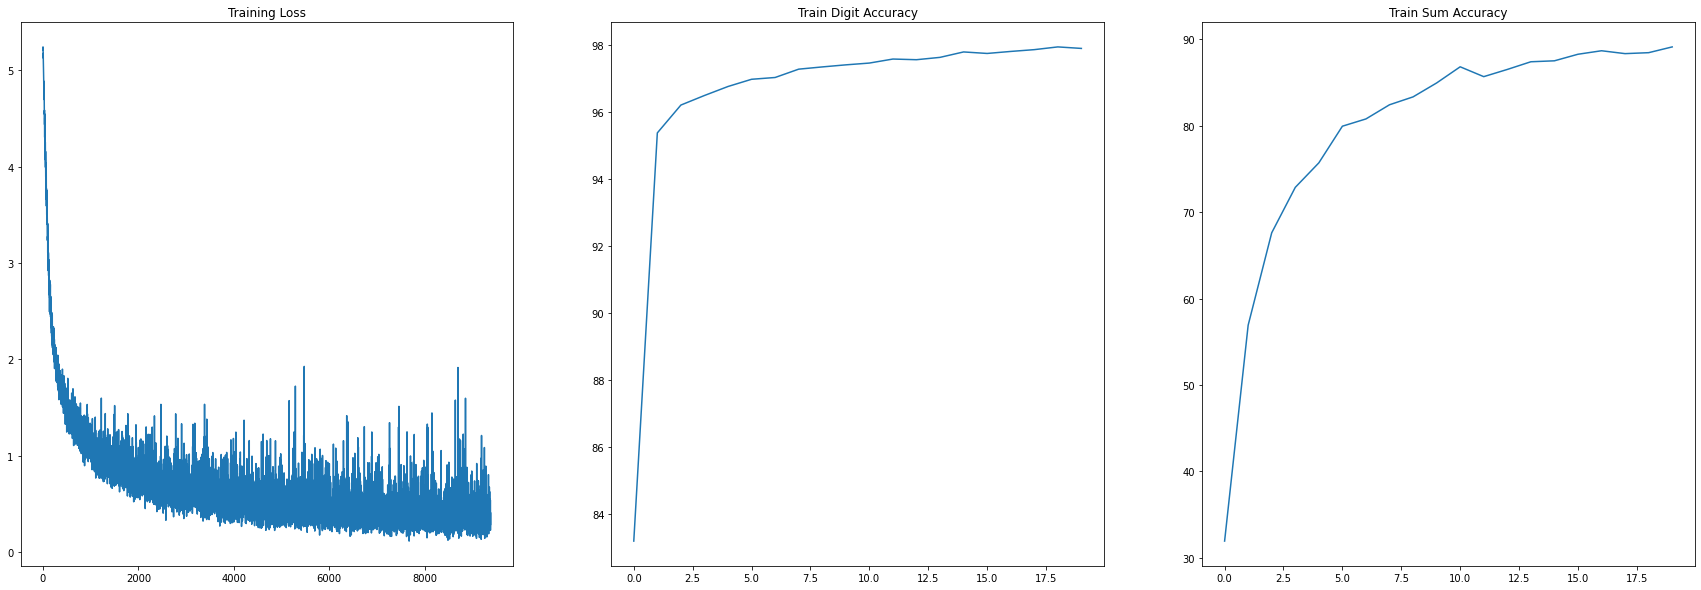

In [22]:
fig, axs = plt.subplots(1,3,figsize=(30,10))
axs[0].plot(train_losses)
axs[0].set_title("Training Loss")
axs[1].plot(train_acc1_epoch)
axs[1].set_title("Train Digit Accuracy")
axs[2].plot(train_acc2_epoch)
axs[2].set_title("Train Sum Accuracy")

Text(0.5, 1.0, 'Test Sum Accuracy')

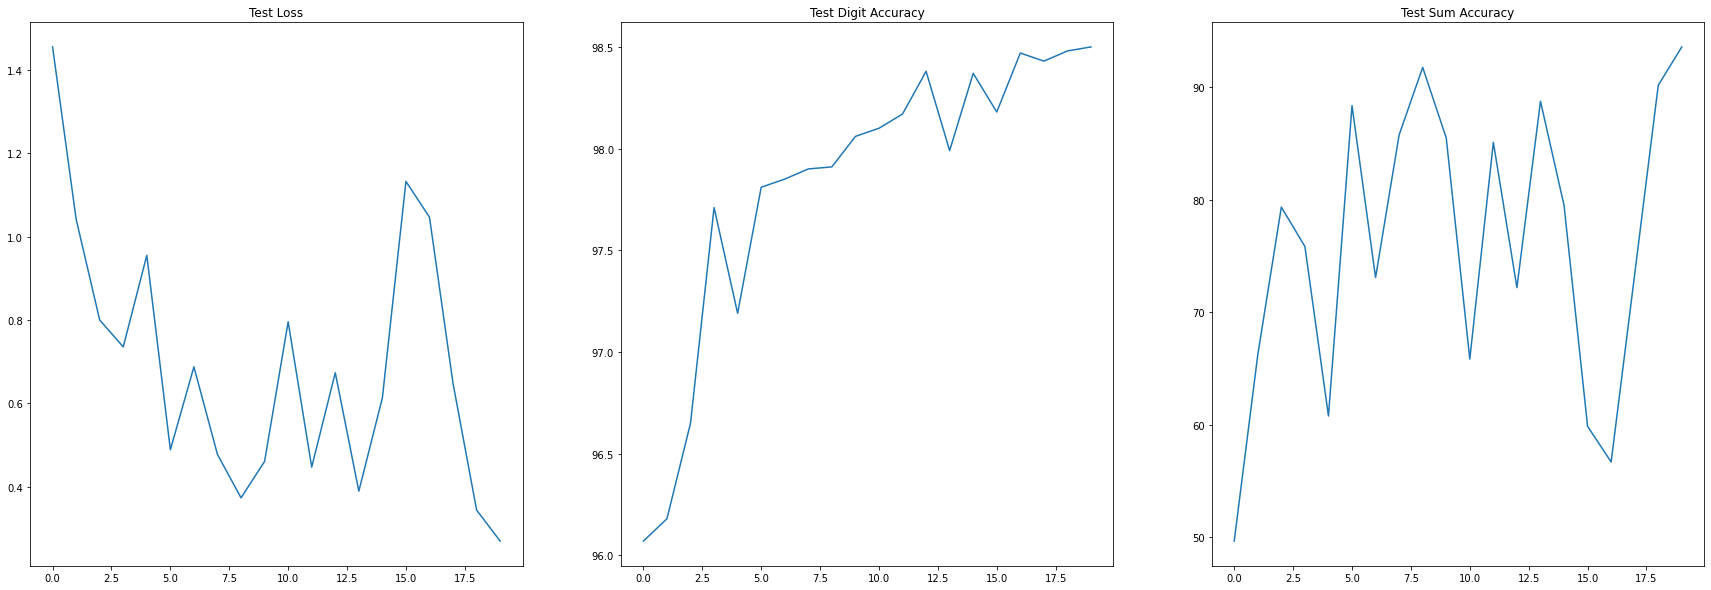

In [23]:
fig, axs = plt.subplots(1,3,figsize=(30,10))
axs[0].plot(test_losses)
axs[0].set_title("Test Loss")
axs[1].plot(test_acc1)
axs[1].set_title("Test Digit Accuracy")
axs[2].plot(test_acc2)
axs[2].set_title("Test Sum Accuracy")